## OBJECTIVE 

The data is related with direct marketing campaigns (phone calls) of a Portugese Bank institution.
The classification goal is to predict if the client will subscribve to a term deposit (y).

## Domain Analysis

#### 1. Introduction

The dataset provided is of a Portuguese bank. They are a banking institution.
We aim to find whether a marketing campaign has helped them increase the number of people who have subscribed to a term deposit.

##### 2. Contextual factors 

Factors in our dataset like the Consumer price index tell us the relative price a customer has paid for the same product. Other factors like the consumer confidence index which tells us how consumers are feeling about the current market situation and the future of the market, and Euribor which is a reference rate that is constructed from the average interest rate at which eurozone banks offer unsecured short-term lending on the inter-bank market, and net rate employed which is The variable, nr  employed, refers to the number of employees in a bank and is also an influential variable on clients' intention to subscribe to the term deposit.

#### 3. Data and Information

The data we have in our dataset is a mixture of categorical Data and Numerical data.




### 1. Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 2. Importing the Data

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
data=pd.read_csv("bank-additional-full.csv")

In [4]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes


In [5]:
data.rename(columns={'loan':'personal_loan','contact':'communication_means','month':'communication_month','day_of_week':'communication_day','fduration_of_call':'duration_of_call','pdays':'last_contacted','previous':'how_many_times_contacted','poutcome':'last_call_outcome','Result(y)':'Result (y)','emp.var.rate':'emp_var_rate'},inplace=True)

### 3. Finding the Null values 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       41188 non-null  int64  
 1   job                       41188 non-null  object 
 2   marital                   41188 non-null  object 
 3   education                 41188 non-null  object 
 4   default                   41188 non-null  object 
 5   housing                   41188 non-null  object 
 6   personal_loan             41188 non-null  object 
 7   communication_means       41188 non-null  object 
 8   communication_month       41188 non-null  object 
 9   communication_day         41188 non-null  object 
 10  duration                  41188 non-null  int64  
 11  campaign                  41188 non-null  int64  
 12  last_contacted            41188 non-null  int64  
 13  how_many_times_contacted  41188 non-null  int64  
 14  last_c

### 4. General info about the Data

In [7]:
data.head()

,age,job,marital,education,default,housing,personal_loan,communication_means,communication_month,communication_day,duration,campaign,last_contacted,how_many_times_contacted,last_call_outcome,emp_var_rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [8]:
data.describe()

,age,duration,campaign,last_contacted,how_many_times_contacted,emp_var_rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.019010
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.178074
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4964.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000


In [9]:
data.select_dtypes(include=['int64','float64']).columns

Index(['age', 'duration', 'campaign', 'last_contacted',
       'how_many_times_contacted', 'emp_var_rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [10]:
data.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'personal_loan',
       'communication_means', 'communication_month', 'communication_day',
       'last_call_outcome', 'y'],
      dtype='object')

###  5. Exploratory Data Analysis 

#### A. Univariant Analysis 

In [11]:
import sweetviz as sv # library for univariant analysis
my_report=sv.analyze(data) # passing the original dataframe
my_report.show_html() # arguments will generate to the library 

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [12]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing',
       'personal_loan', 'communication_means', 'communication_month',
       'communication_day', 'duration', 'campaign', 'last_contacted',
       'how_many_times_contacted', 'last_call_outcome', 'emp_var_rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [13]:
data1=data[['age', 'duration', 'campaign', 'last_contacted',
       'how_many_times_contacted', 'emp_var_rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']]
data2=data[['job', 'marital', 'education', 'default', 'housing', 'personal_loan',
       'communication_means', 'communication_month', 'communication_day',
       'last_call_outcome']]

In [14]:
# Histplots for Data1 (Numerical Data)

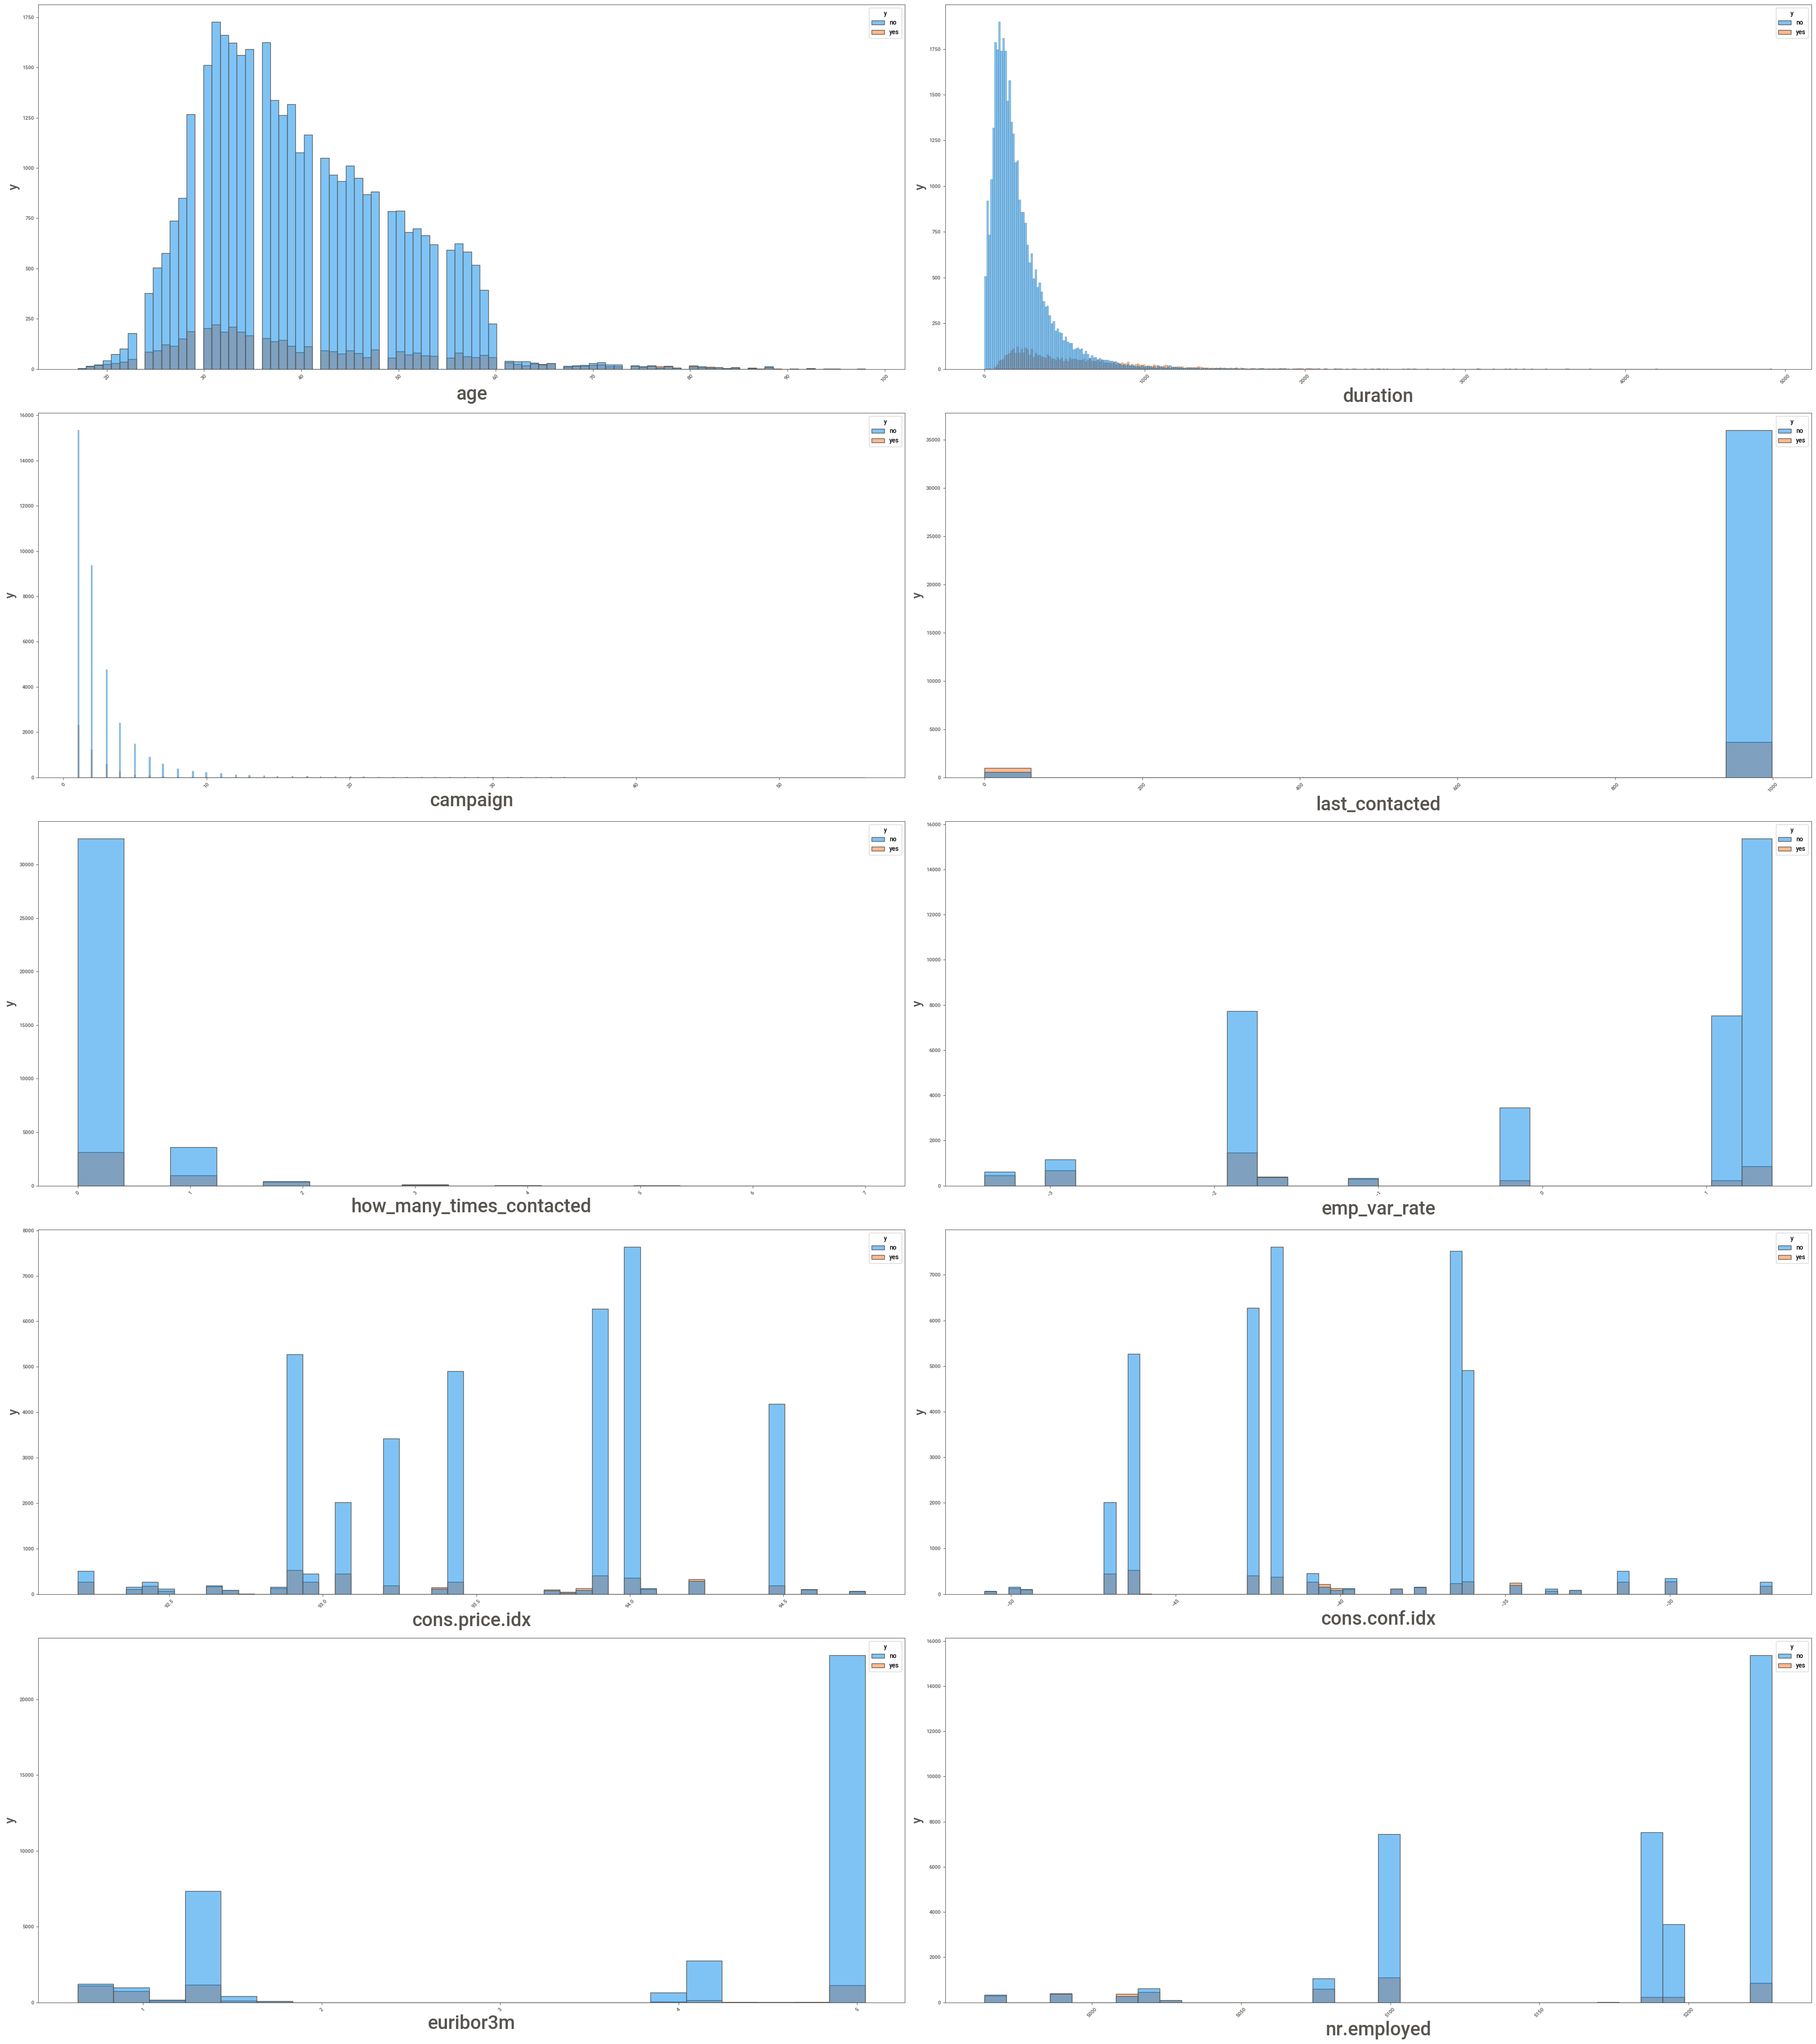

In [15]:
plt.figure(figsize=(40,45), facecolor='white')

plotnumber = 1

for column in data1:
    if plotnumber <= 16:
        plt.subplot(5, 2, plotnumber)
        sns.histplot(x=data1[column], hue=data['y'])
        plt.xlabel(column, fontsize=30)  # Decreased the fontsize for better visualization
        plt.ylabel("y", fontsize=20, rotation=90)
        plt.xticks(rotation=45)
    plotnumber += 1

plt.tight_layout()

In [16]:
# Count Plot (Categorical data)

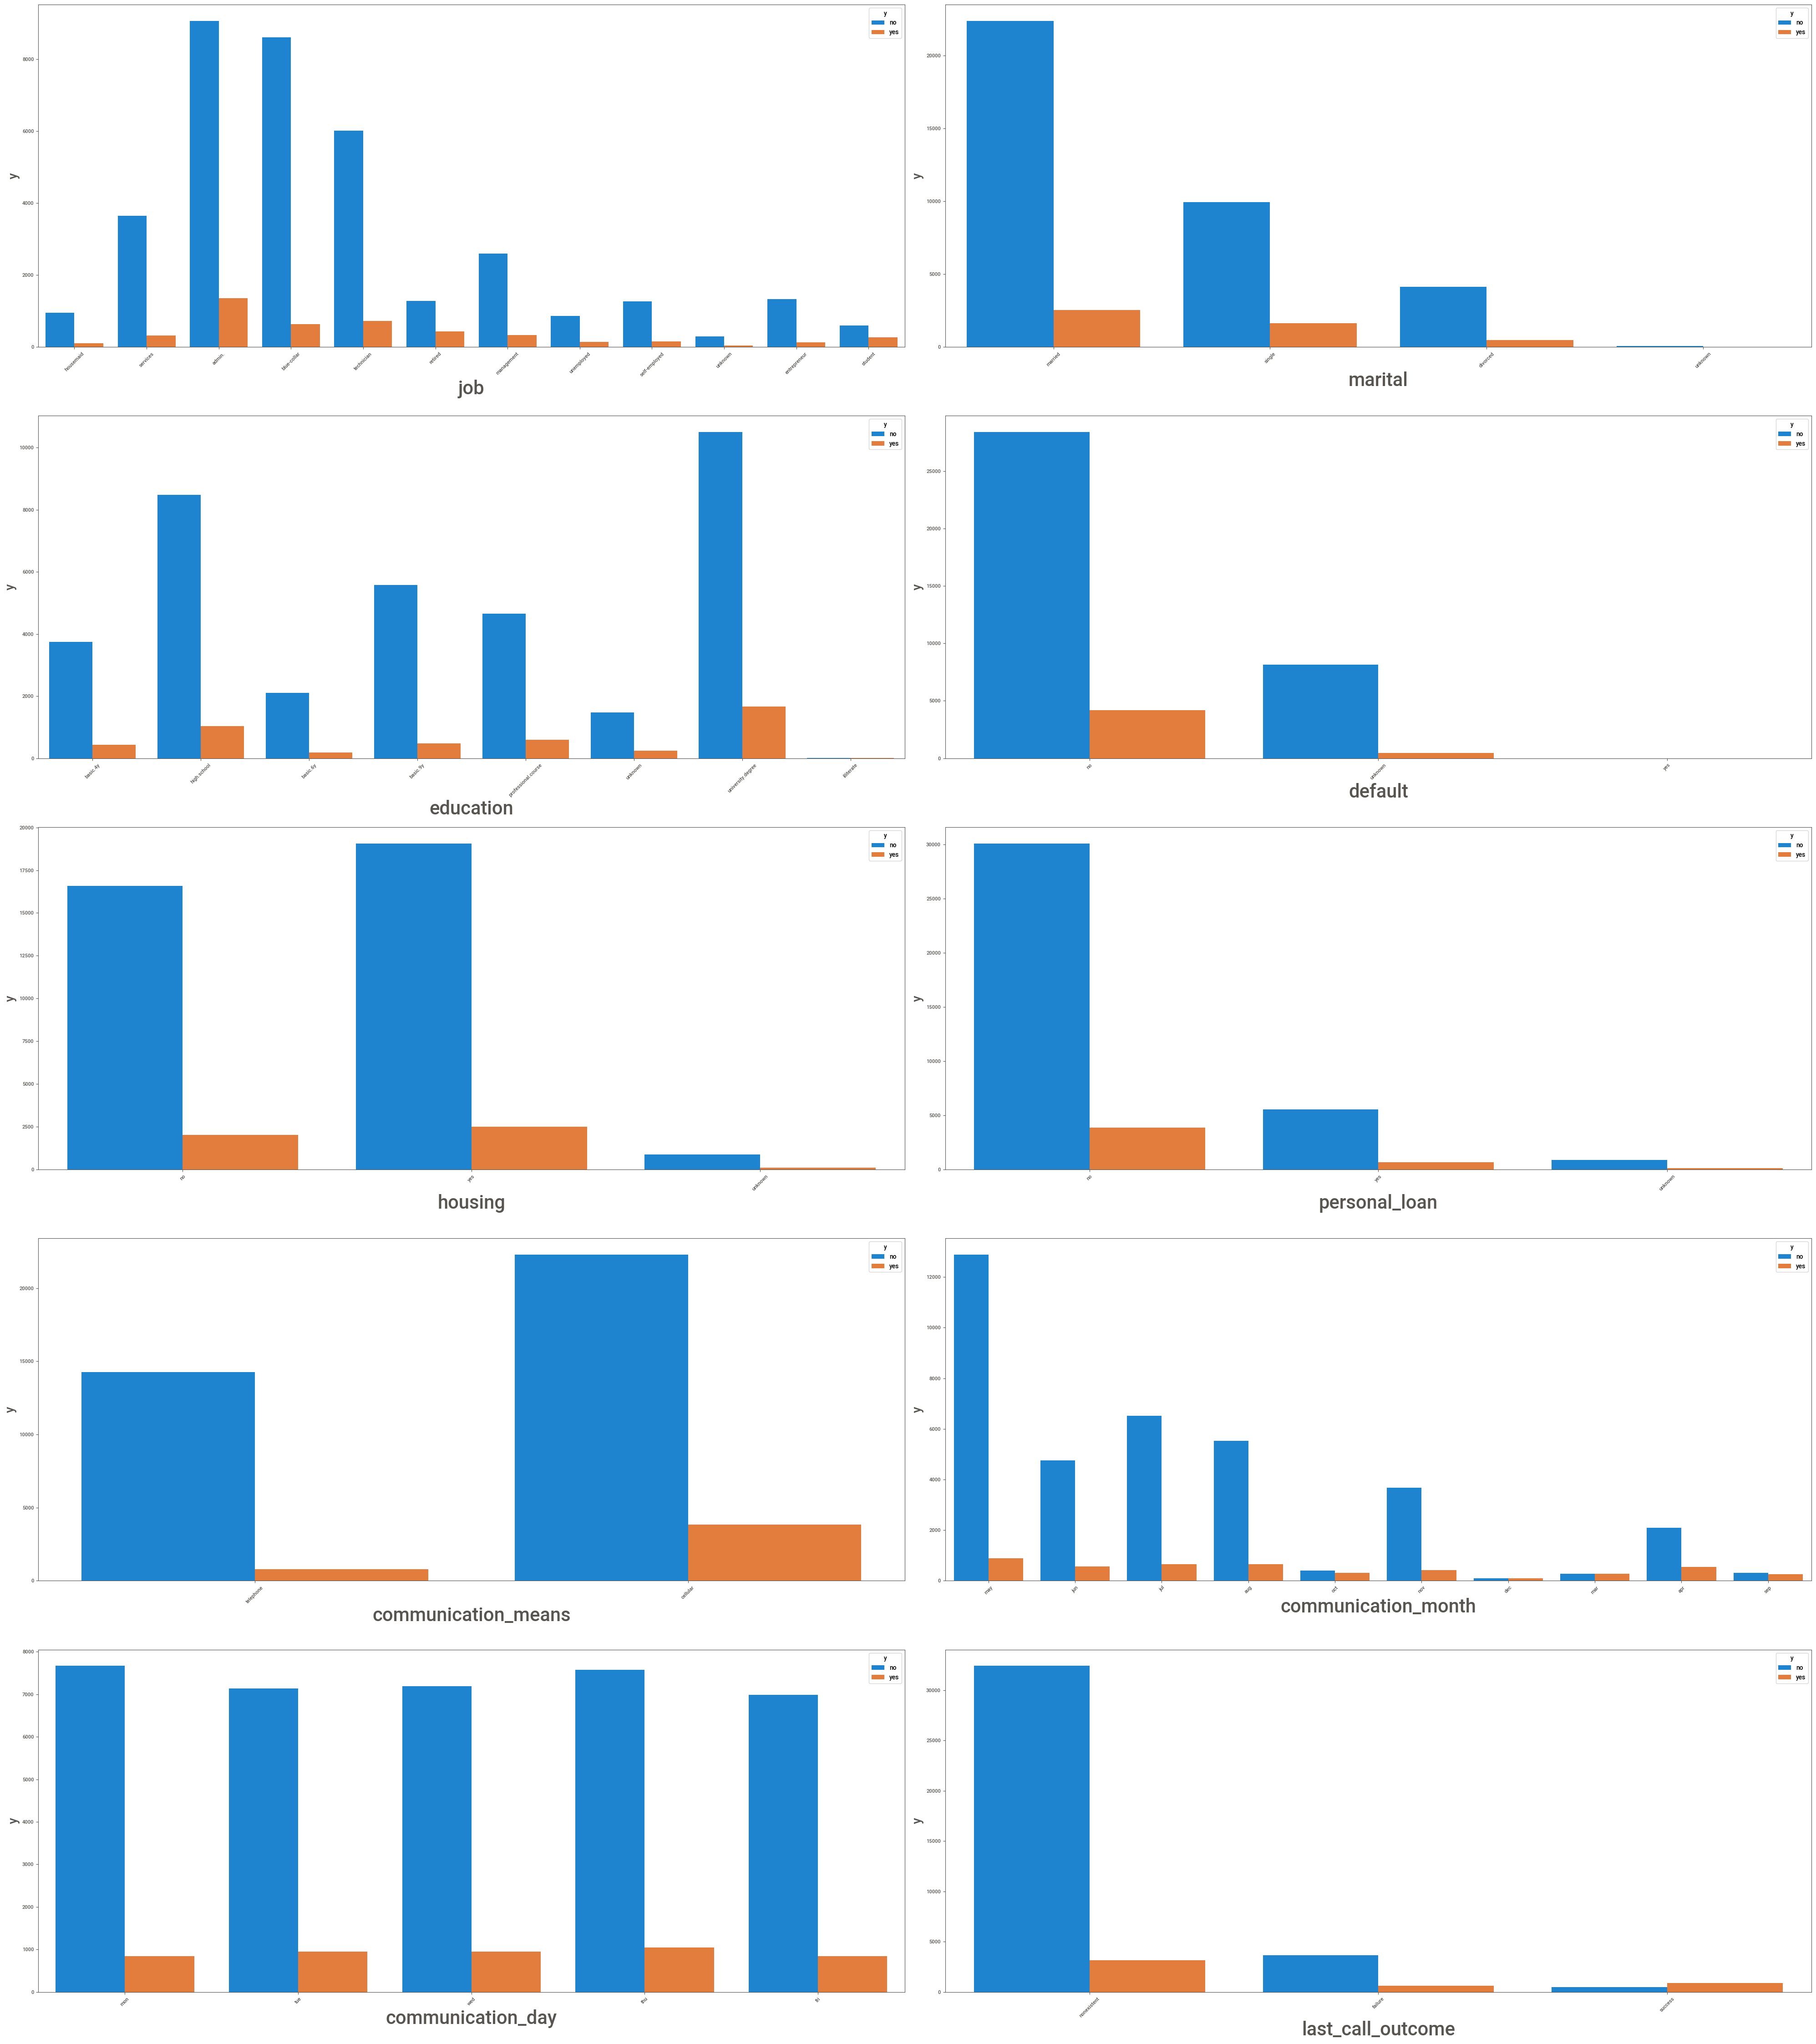

In [17]:
plt.figure(figsize=(40,45), facecolor='white')

plotnumber = 1

for column in data2:
    if plotnumber <= 16:
        plt.subplot(5, 2, plotnumber)
        sns.countplot(x=data2[column], hue=data['y'])
        plt.xlabel(column, fontsize=30)  # Decreased the fontsize for better visualization
        plt.ylabel("y", fontsize=20, rotation=90)
        plt.xticks(rotation=45)
    plotnumber += 1

plt.tight_layout()

#### B. Bivariant Analysis

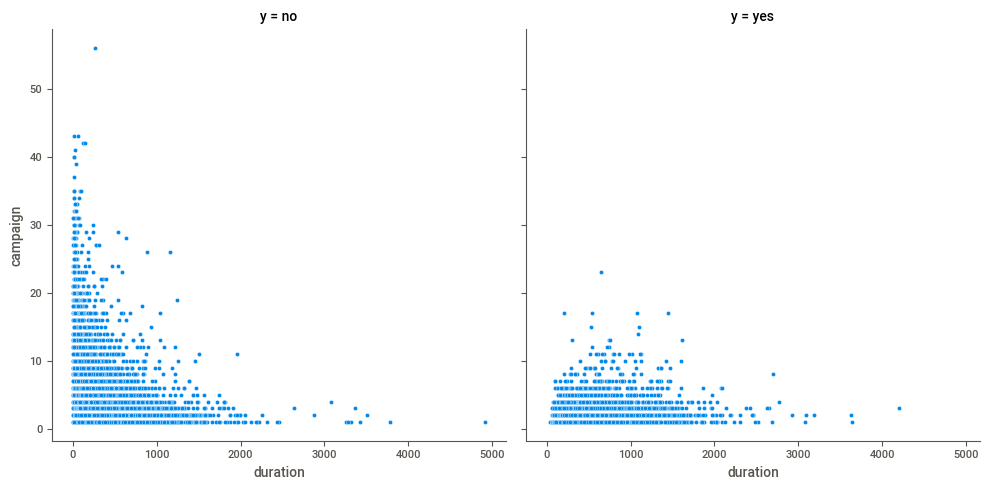

In [18]:
sns.relplot(x='duration',y='campaign',col='y',data=data)
plt.show()

#### Analysis For Bi-Variant

In the Bi variant analyis we can see the relation of call duration with wether a call atendee has subscribed to the term deposit.

#### C. Multi Variant Analysis

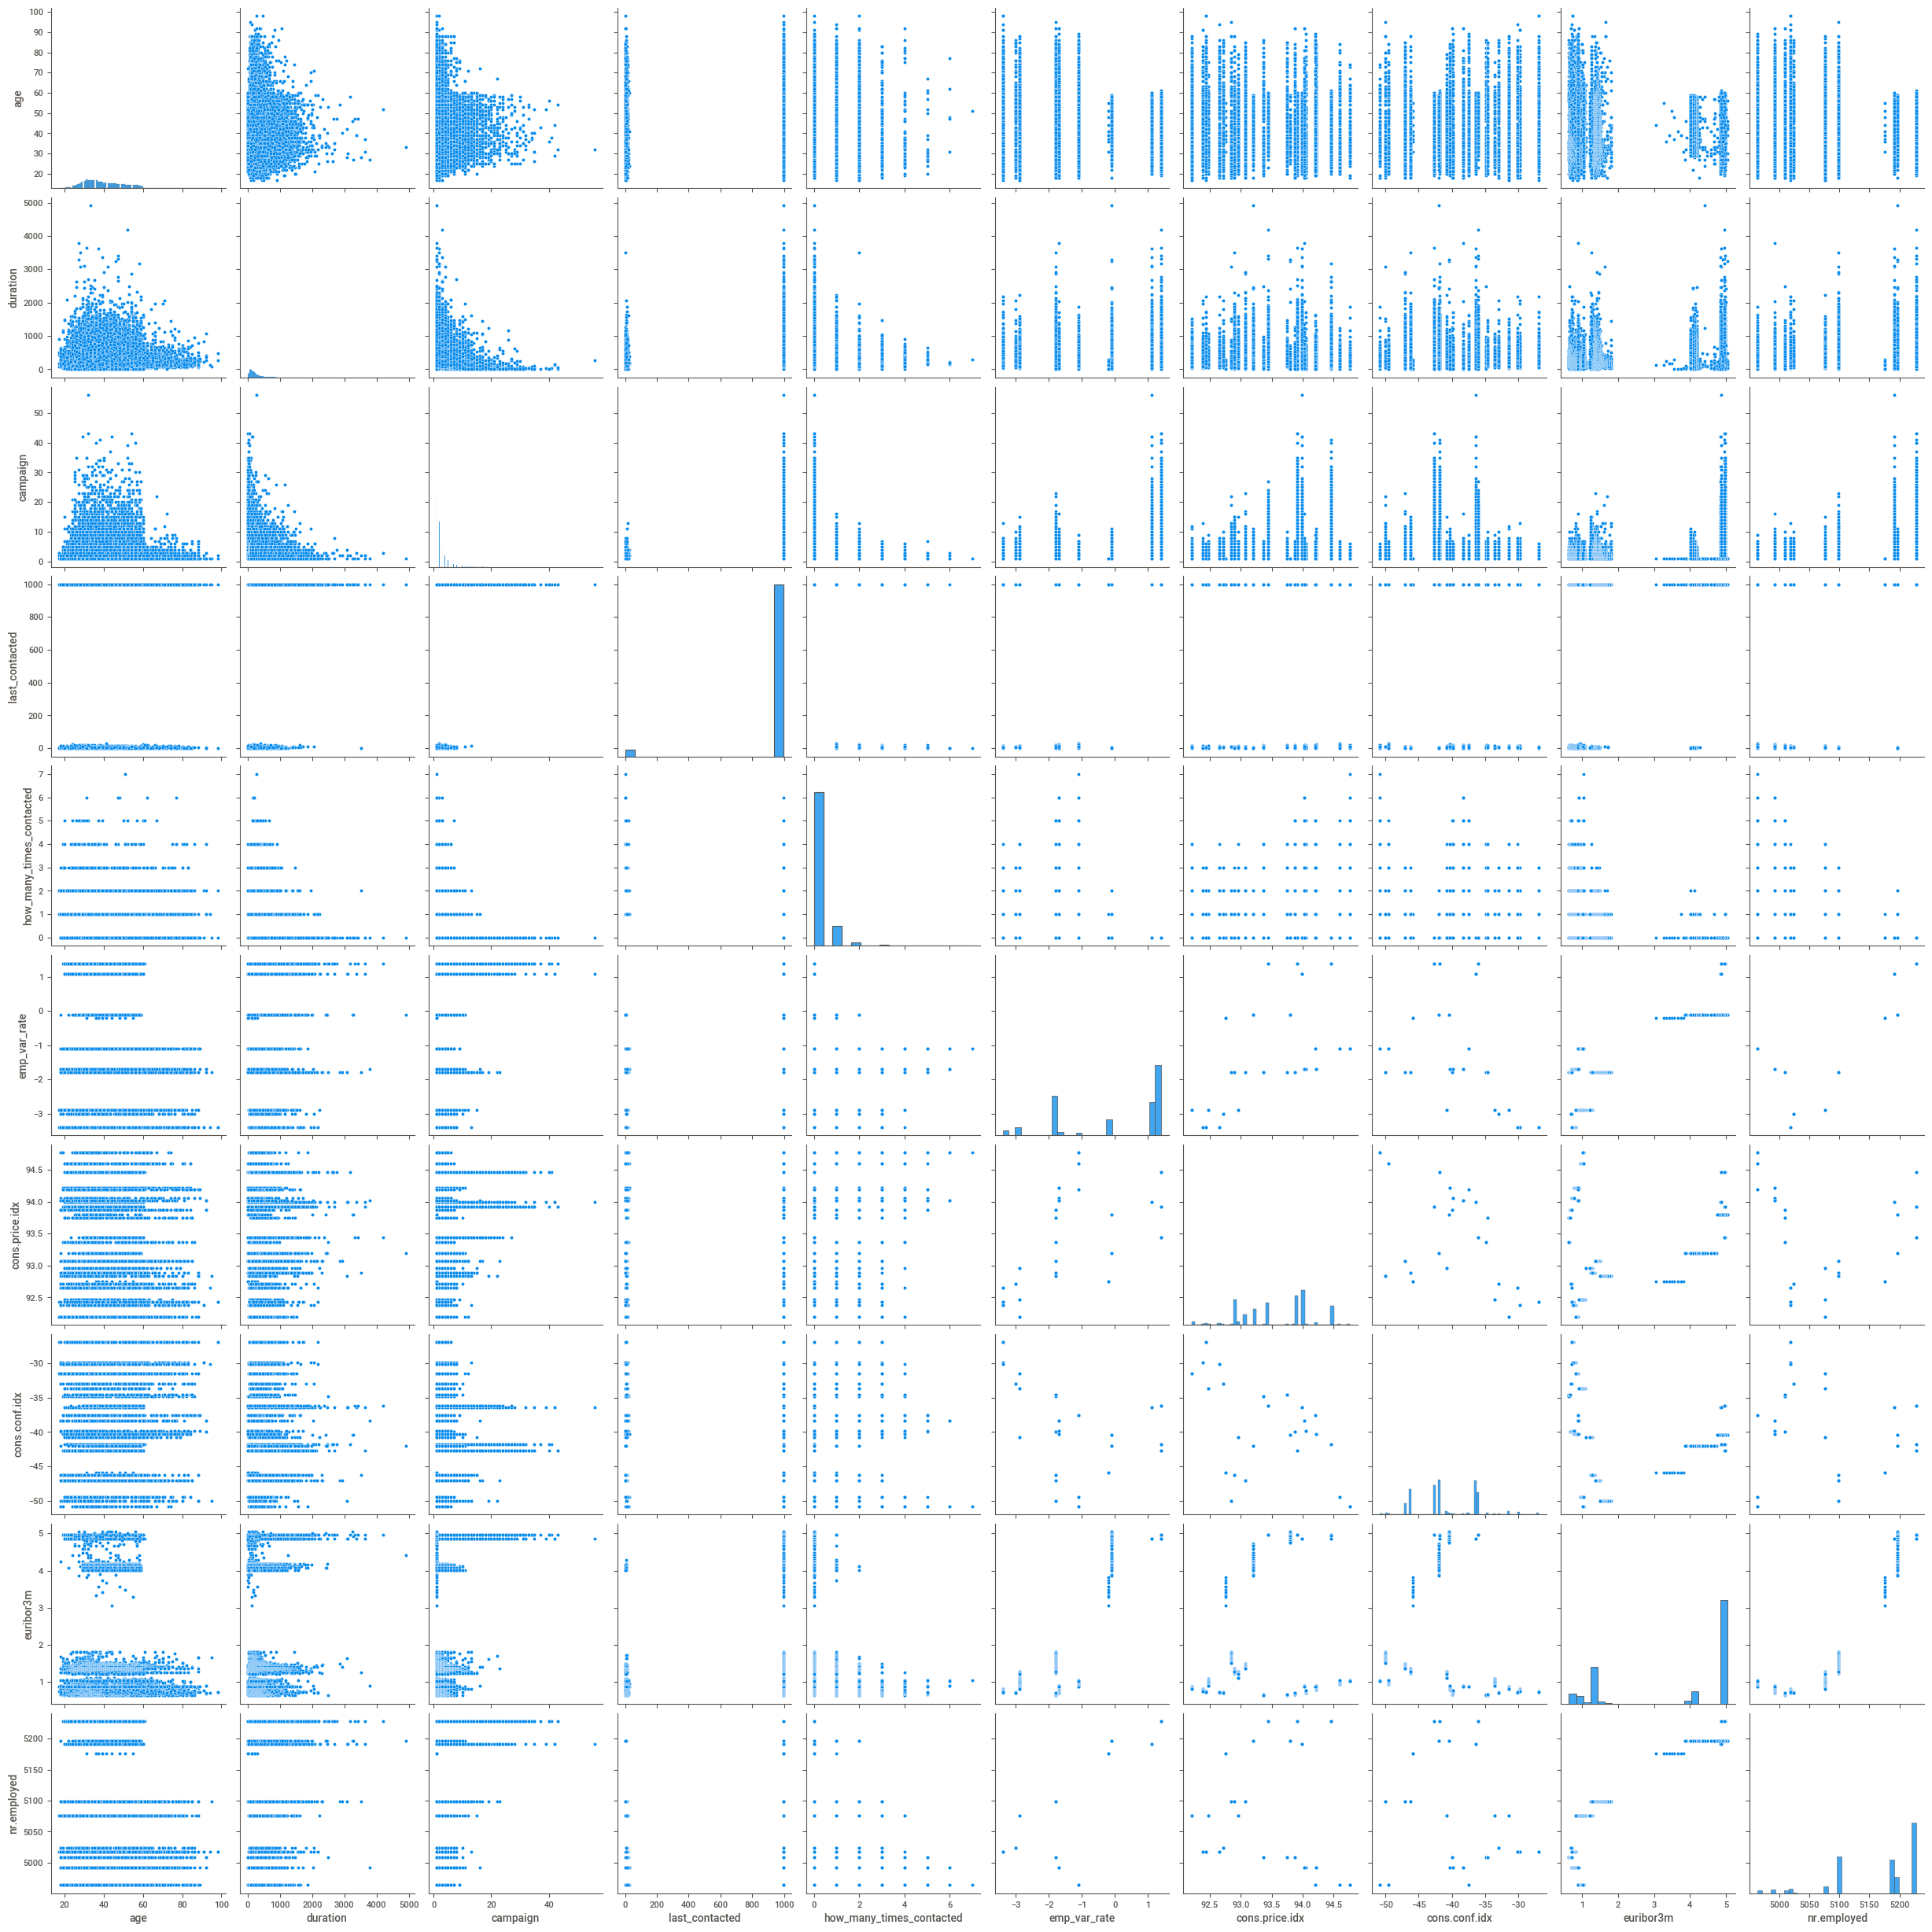

In [19]:
sns.pairplot(data)

### On the basis of the analyses reports we can observe that :
     1. People aged between 30-40 years were contacted the most
     2. People from "admin" job role and people from "blue-collared" job roles were contacted the most 
     3. Married people were contacted the most followed by single people
     4. people with 'university' education followed by 'high school' education were contacted the most 
     5. we can see that most of the people that were contacted did not have a default status
     6. 52% of the people contacted had prior housing loans
     7. 82% of the people contacted did not have any sort of personal loan running
     8. 63% of the people were contacted via 'cellular' means whereas 37% were contacted via 'telephone'
     9. most people were contacted in the month of may
     10. The days in which people were contacted were evenly spread across the weekdays
     11. The duration of calls were on an average of 4.3 minutes
     12. A person was contacted an average of 2.6 times
     13. 86% of the people were contacted for the first time 
     14. The data from the success of previous calls is mostly non-existent 

### 6. Data Preprocessing and Feature Engineering

In [20]:
for i in data.columns:
    data[i].replace("", np.nan,inplace=True)

In [21]:
data.isnull().sum()

age                         0
job                         0
marital                     0
education                   0
default                     0
housing                     0
personal_loan               0
communication_means         0
communication_month         0
communication_day           0
duration                    0
campaign                    0
last_contacted              0
how_many_times_contacted    0
last_call_outcome           0
emp_var_rate                0
cons.price.idx              0
cons.conf.idx               0
euribor3m                   0
nr.employed                 0
y                           0
dtype: int64

In [22]:
# There are no null values in the dataset

#### Converting Categorical data into Numerical data 

In [23]:
data.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'personal_loan',
       'communication_means', 'communication_month', 'communication_day',
       'last_call_outcome', 'y'],
      dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [25]:
#job
data.job =enc.fit_transform(data.job )

#marital
data.marital =enc.fit_transform(data.marital )

#education
data.education =enc.fit_transform(data.education )

#default
data.default =enc.fit_transform(data.default )

#housing
data.housing =enc.fit_transform(data.housing )

#personal_loan
data.personal_loan =enc.fit_transform(data.personal_loan )

#communication_means
data.communication_means =enc.fit_transform(data.communication_means )

#communication_month
data.communication_month =enc.fit_transform(data.communication_month )

#communication_day
data.communication_day =enc.fit_transform(data.communication_day )

#last_call_outcome
data.last_call_outcome =enc.fit_transform(data.last_call_outcome )

#y
data.y =enc.fit_transform(data.y )

In [26]:
# Convert float into int.

In [27]:
data['emp_var_rate'] = data['emp_var_rate'].astype(int)
data['cons.price.idx'] = data['cons.price.idx'].astype(int)
data['cons.conf.idx'] = data['cons.conf.idx'].astype(int)
data['euribor3m'] = data['euribor3m'].astype(int)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       41188 non-null  int64
 1   job                       41188 non-null  int32
 2   marital                   41188 non-null  int32
 3   education                 41188 non-null  int32
 4   default                   41188 non-null  int32
 5   housing                   41188 non-null  int32
 6   personal_loan             41188 non-null  int32
 7   communication_means       41188 non-null  int32
 8   communication_month       41188 non-null  int32
 9   communication_day         41188 non-null  int32
 10  duration                  41188 non-null  int64
 11  campaign                  41188 non-null  int64
 12  last_contacted            41188 non-null  int64
 13  how_many_times_contacted  41188 non-null  int64
 14  last_call_outcome         41188 non-nu

In [29]:
data.head()

,age,job,marital,education,default,housing,personal_loan,communication_means,communication_month,communication_day,duration,campaign,last_contacted,how_many_times_contacted,last_call_outcome,emp_var_rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1,93,-36,4,5191,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1,93,-36,4,5191,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1,93,-36,4,5191,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1,93,-36,4,5191,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1,93,-36,4,5191,0


#### Feature Selection

##### (A) Checking for correlation

In [30]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing',
       'personal_loan', 'communication_means', 'communication_month',
       'communication_day', 'duration', 'campaign', 'last_contacted',
       'how_many_times_contacted', 'last_call_outcome', 'emp_var_rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [31]:
corr_data=data[['age', 'job', 'marital', 'education', 'default', 'housing',
       'personal_loan', 'communication_means', 'communication_month',
       'communication_day', 'duration', 'campaign', 'last_contacted',
       'how_many_times_contacted', 'last_call_outcome', 'emp_var_rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]

<Axes: >

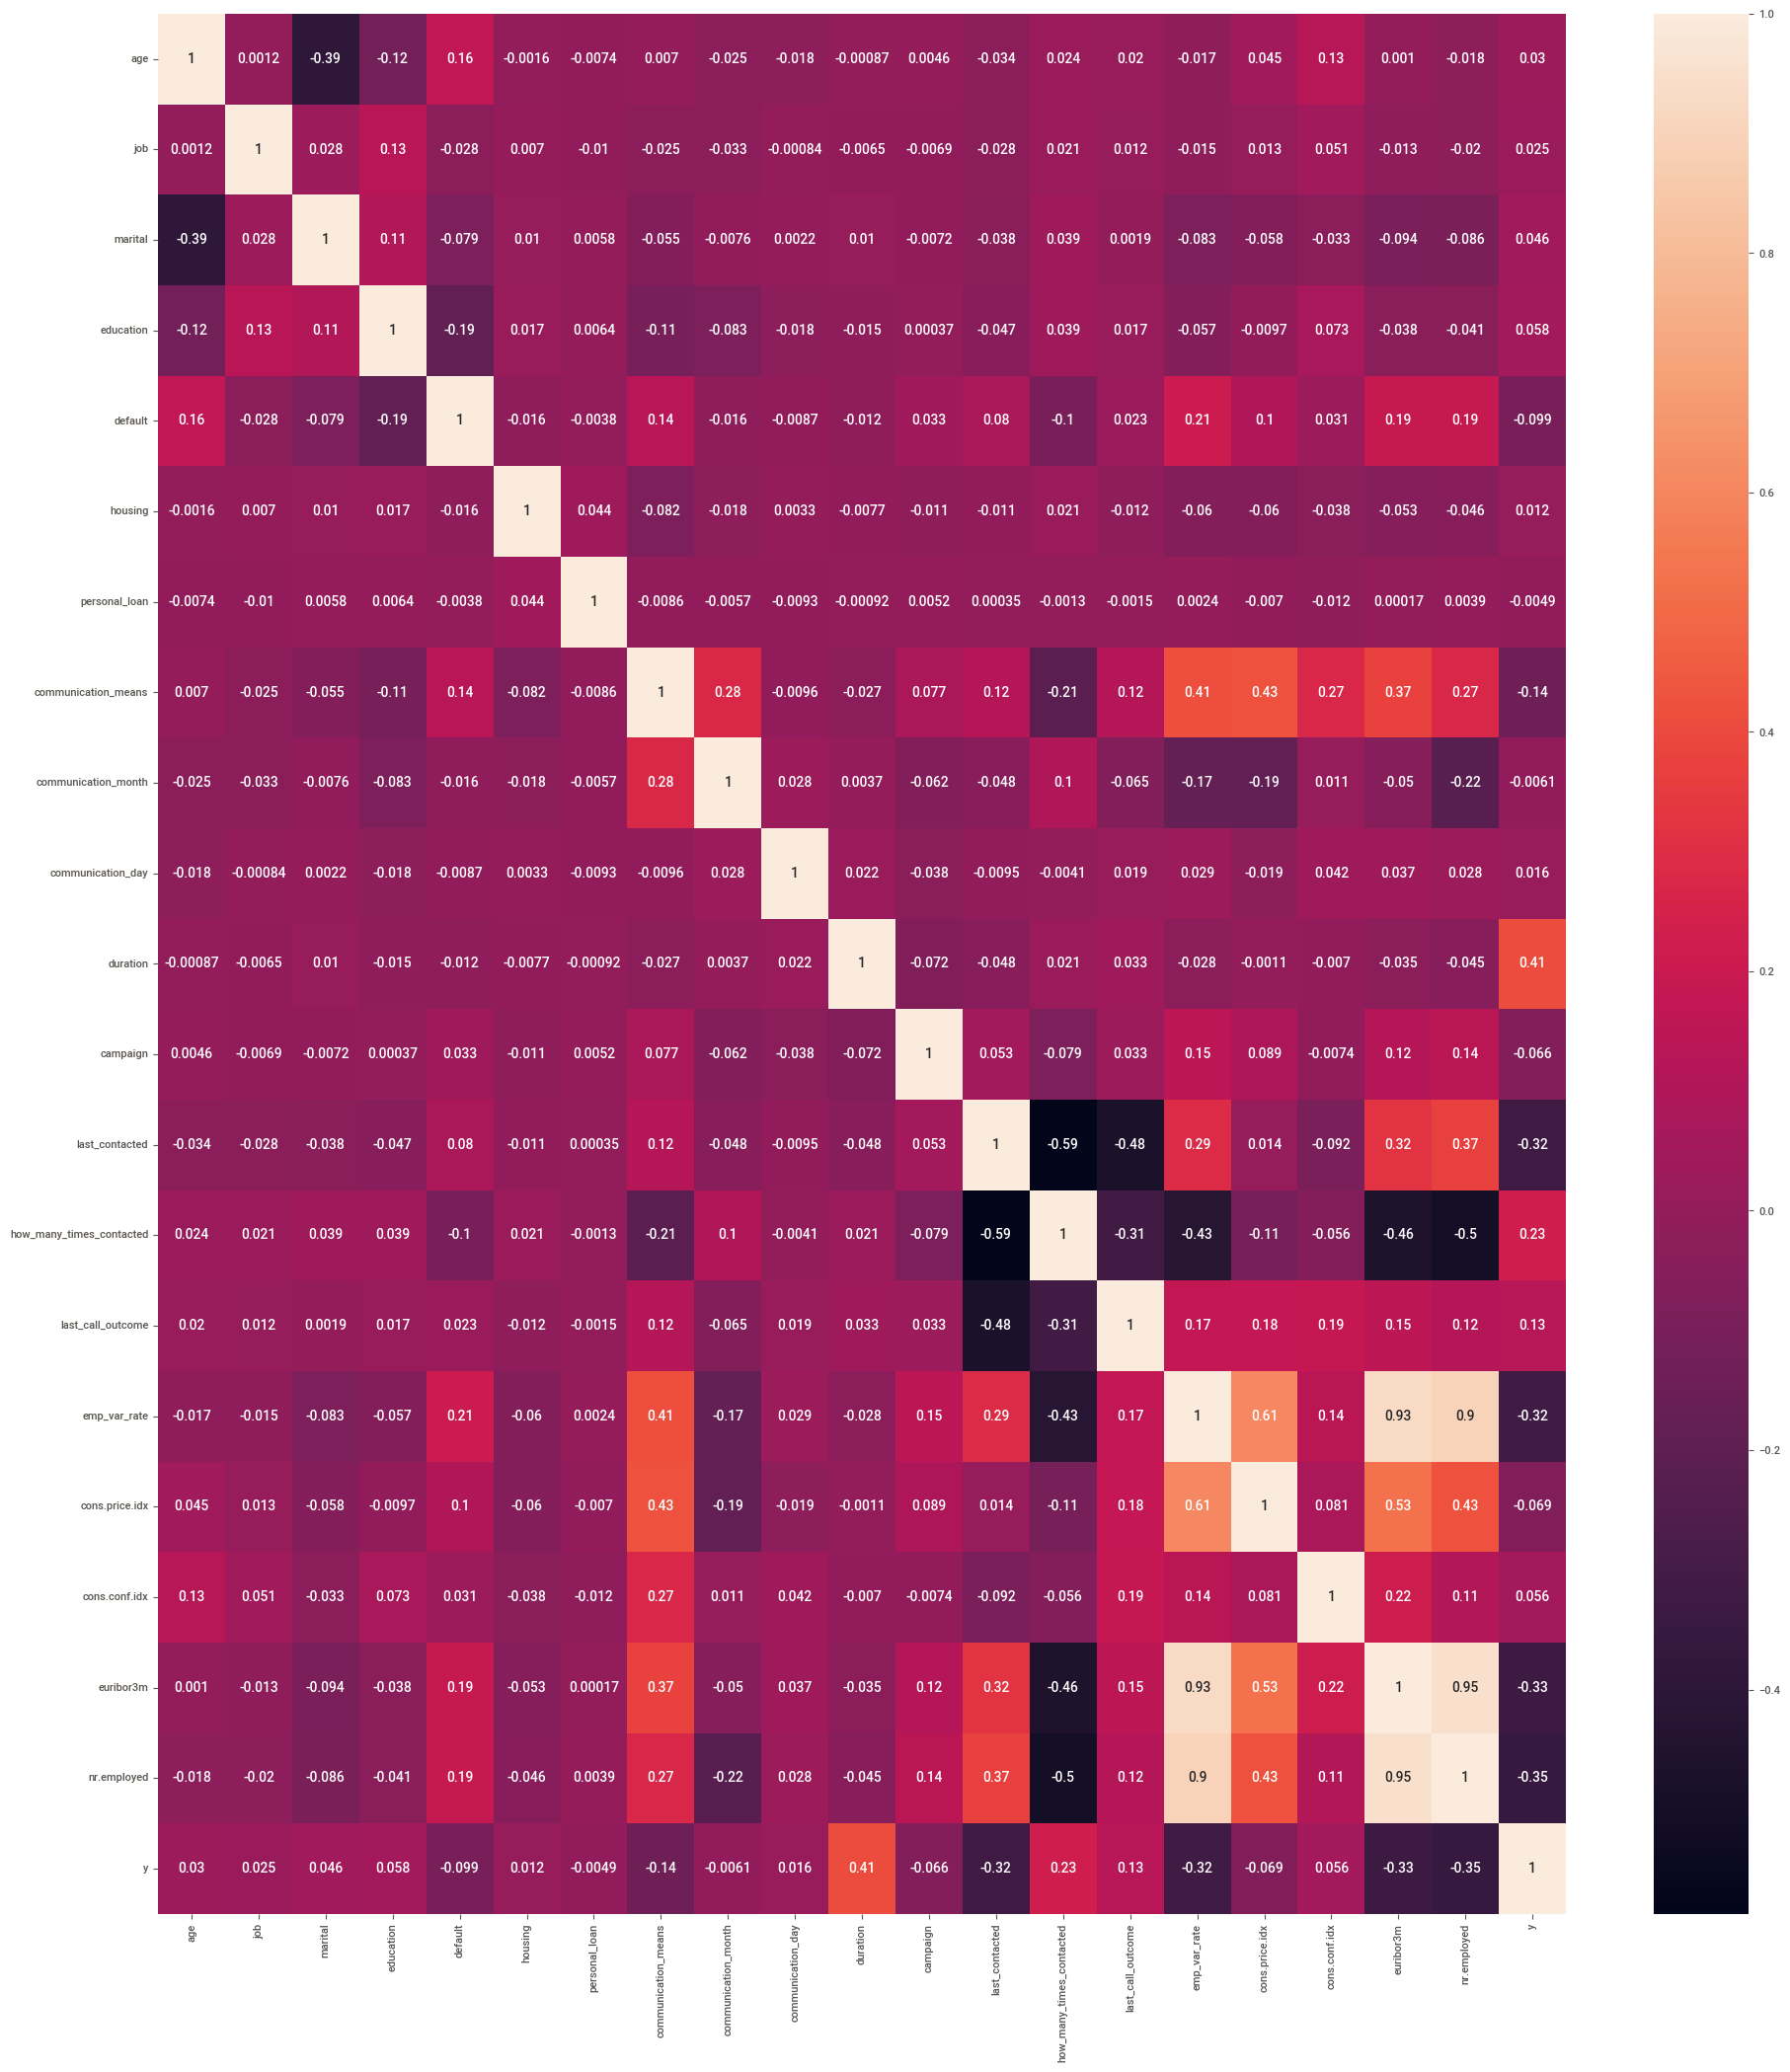

In [32]:
plt.figure(figsize=(23,25))
sns.heatmap(corr_data.corr(),annot=True)

#### Correlation Analysis
From the above heatmap we can conclude that there is no correlation between the features given in the dataset.

##### (B) Checking outliers

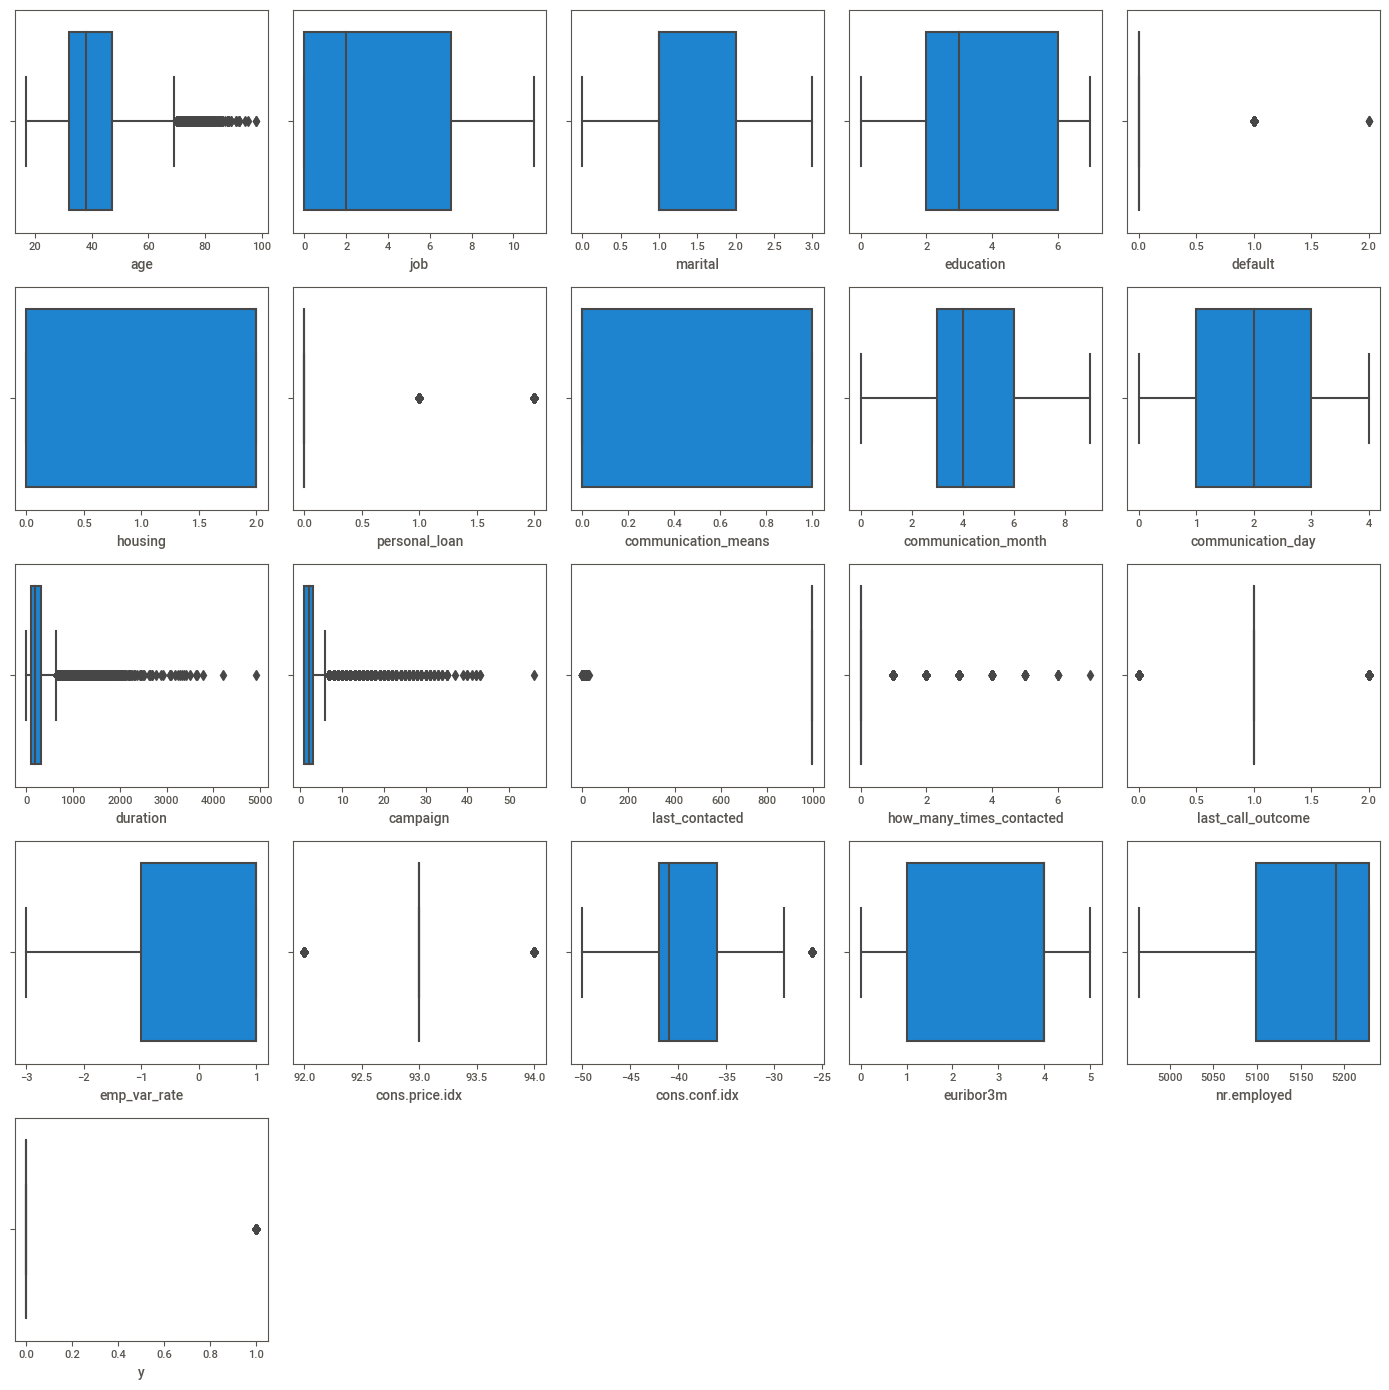

In [33]:
plt.figure(figsize=(14, 14))
plotnumber = 1

for i in data:
    plt.subplot(5, 5, plotnumber)
    sns.boxplot(x=data[i])
    plotnumber += 1
    if plotnumber > 25:
        break

plt.tight_layout()
plt.show()

###### Splitting the data into train and test split

In [34]:
X=data.drop('y',axis=1)
y=data.y

In [35]:
X.shape

(41188, 20)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print(X_train.shape)
print(X_test.shape)

(32950, 20)
(8238, 20)


In [38]:
X_train

,age,job,marital,education,default,housing,personal_loan,communication_means,communication_month,communication_day,duration,campaign,last_contacted,how_many_times_contacted,last_call_outcome,emp_var_rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12556,40,1,1,2,1,2,0,1,3,1,94,2,999,0,1,1,93,-42,4,5228
35451,31,0,1,6,0,0,0,0,6,1,116,4,999,0,1,-1,92,-46,1,5099
30592,59,5,1,0,0,0,0,0,6,1,13,6,999,1,0,-1,92,-46,1,5099
17914,43,3,0,2,0,2,0,0,3,3,94,5,999,0,1,1,93,-42,4,5228
3315,39,0,2,3,1,0,0,1,6,2,344,2,999,0,1,1,93,-36,4,5191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58,5,1,5,1,0,0,1,6,3,427,2,999,0,1,1,93,-36,4,5191
11284,37,4,1,6,0,0,0,1,4,2,288,1,999,0,1,1,94,-41,4,5228
38158,35,0,1,3,0,2,0,0,8,2,194,1,4,1,2,-3,92,-26,0,5018
860,40,4,1,6,0,2,0,1,6,4,295,2,999,0,1,1,93,-36,4,5191


In [39]:
X_test

,age,job,marital,education,default,housing,personal_loan,communication_means,communication_month,communication_day,duration,campaign,last_contacted,how_many_times_contacted,last_call_outcome,emp_var_rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
32884,57,9,1,3,0,0,2,0,6,1,371,1,999,1,0,-1,92,-46,1,5099
3169,55,11,1,7,1,2,0,1,6,2,285,2,999,0,1,1,93,-36,4,5191
32206,33,1,1,2,0,0,0,0,6,0,52,1,999,1,0,-1,92,-46,1,5099
9403,36,0,1,3,0,0,0,1,4,0,355,4,999,0,1,1,94,-41,4,5228
14020,27,3,1,3,0,2,0,0,3,0,189,2,999,0,1,1,93,-42,4,5228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12322,27,7,1,3,1,0,0,1,3,0,584,1,999,0,1,1,93,-42,4,5228
23440,41,9,0,5,0,0,0,0,1,4,167,7,999,0,1,1,93,-36,4,5228
29431,46,2,2,6,0,2,2,0,0,1,142,12,999,1,0,-1,93,-47,1,5099
16627,31,0,2,6,0,2,0,0,3,4,1327,2,999,0,1,1,93,-42,4,5228


In [40]:
y_train

12556    0
35451    0
30592    0
17914    0
3315     0
        ..
6265     0
11284    0
38158    1
860      0
15795    0
Name: y, Length: 32950, dtype: int32

In [41]:
y_test

32884    0
3169     0
32206    0
9403     0
14020    0
        ..
12322    1
23440    0
29431    0
16627    1
1871     0
Name: y, Length: 8238, dtype: int32

##### Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
# Let's see oue target variable is balanced or not if it's not balanced. So, we have to apply SMOTE for balanced the data.
y.value_counts()
# here we can see our target variable is not balanced.

y
0    36548
1     4640
Name: count, dtype: int64

### 8. Model Creation  

##### A. LogisticRegression

In [44]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


# Initialize Logistic Regression Classifier
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier on the training data
logreg_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = logreg_classifier.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


F1 Score: 0.901451369668073


##### B. Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score


# Define DecisionTreeClassifier model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

# Calculate F1 score on test set
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score on test set:", f1)


F1 score on test set: 0.887223815029056


##### C. Support Vector Machine (SVM)

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# X = Your feature matrix
# y = Your target vector


# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.8988832240835154
F1 Score: 0.8806071255064123


##### D. Random Forest 

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


# Define RandomForestClassifier model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

# Calculate F1 score on test set
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score on test set:", f1)


F1 score on test set: 0.907867986605294


##### E. Gradient Boosting 

In [48]:
# Importing necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score


# Initialize Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


Accuracy: 0.9175770818159747
F1 Score: 0.9128718819665907


## Suggestions to the Bank Marketing Team

1. We recommend focusing primarily on individuals aged between 20 and 50 years, as they exhibit a higher          likelihood of subscribing.
2. It is advisable to reach out to individuals holding positions in "administration" and "blue-collar"            roles, as they demonstrate a significant propensity for subscribing.
3. We recommend contacting individuals with a "university degree" or "high school" education level, as they        are inclined to subscribe.
4. Our analysis indicates that the majority of responses are from individuals contacted via "cellular"            means.
5. It is suggested to maintain the duration of calls at approximately 600 seconds or 10 minutes.


## Classification Report 

## Model Comparison Report  

We note that the Gradient Boosting algorithm has yielded the optimal model with the highest F1 score of 91.28%, while Decision Tree has produced the least effective model.
       

## Report on Challenges Faced

1. Transforming unstructured data into tabular format, followed by exporting it into a CSV file.
2. Analyzing the data and identifying its requirements.
3. During the conversion of Object data type to Numerical data type, manual encoding was necessary for all        columns.
4. Integrating all Machine Learning models into a unified code for improved accessibility and clarity.